<h1 style="text-align: center;"><font size="10">Loan Classification</font></h1>
<h3 style="text-align: center;"><font size="5">Machine Learning with Python Final Project</font></h3>

## Data Import
#### Initialize Environment

In [578]:
import pandas as pd
from IPython.display import display

#### Import Training Data

In [579]:
train_df = pd.read_csv("File:///Users/zhoufang/Documents/Projects/Notebooks/LoanDataProject/LoanDataProject/Data/loan_train.csv")

train_df.drop(train_df.columns[[0, 1]], axis = 1, inplace = True)
train_df = train_df.rename(columns = {'Principal' : 'principal', 'Gender' : 'gender'})
train_df['effective_date'] = pd.to_datetime(train_df['effective_date'])
train_df['due_date'] = pd.to_datetime(train_df['due_date'])
train_df['education'].replace(to_replace = ['High School or Below', 'Bechalor', 'Master or Above'], value = ['high school or below', 'bachelor', 'master or above'], inplace = True)

display(train_df.head())

,loan_status,principal,terms,effective_date,due_date,age,education,gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,high school or below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,bachelor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


#### Import Testing Data

In [580]:
test_df = pd.read_csv("File:///Users/zhoufang/Documents/Projects/Notebooks/LoanDataProject/LoanDataProject/Data/loan_test.csv")

test_df.drop(test_df.columns[[0, 1]], axis = 1, inplace = True)
test_df = test_df.rename(columns = {'Principal' : 'principal', 'Gender' : 'gender'})
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['education'].replace(to_replace = ['High School or Below', 'Bechalor', 'Master or Above'], value = ['high school or below', 'bachelor', 'master or above'], inplace = True)

display(test_df.head())

,loan_status,principal,terms,effective_date,due_date,age,education,gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,bachelor,female
1,PAIDOFF,300,7,2016-09-09,2016-09-15,35,master or above,male
2,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,high school or below,female
3,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male
4,PAIDOFF,800,15,2016-09-11,2016-09-25,29,bachelor,male


## K Nearest Neighbors Model Training
#### Initialize Environment

In [581]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

#### Encode Data

In [582]:
KNN_df = train_df.copy(deep = True);

KNN_df['gender'].replace(to_replace = ['male', 'female'], value = [0, 1], inplace = True)
KNN_df['education'].replace(to_replace = ['high school or below', 'college', 'bachelor', 'master or above'], value = [0, 1, 2, 3], inplace = True)

display(KNN_df.head())

,loan_status,principal,terms,effective_date,due_date,age,education,gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,0,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,2,1
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,1,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,1,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,1,0


#### Pre-Process Data

In [583]:
KNN_df['eff_day_of_week'] = KNN_df['effective_date'].dt.dayofweek

KNN_df.drop(KNN_df.columns[[3, 4]], axis = 1, inplace = True);

KNN_df = KNN_df[['loan_status', 'principal', 'terms', 'eff_day_of_week', 'age', 'education', 'gender']]

display(KNN_df.head())

,loan_status,principal,terms,eff_day_of_week,age,education,gender
0,PAIDOFF,1000,30,3,45,0,0
1,PAIDOFF,1000,30,3,33,2,1
2,PAIDOFF,1000,15,3,27,1,0
3,PAIDOFF,1000,30,4,28,1,1
4,PAIDOFF,1000,30,4,29,1,0


#### Visualize Data

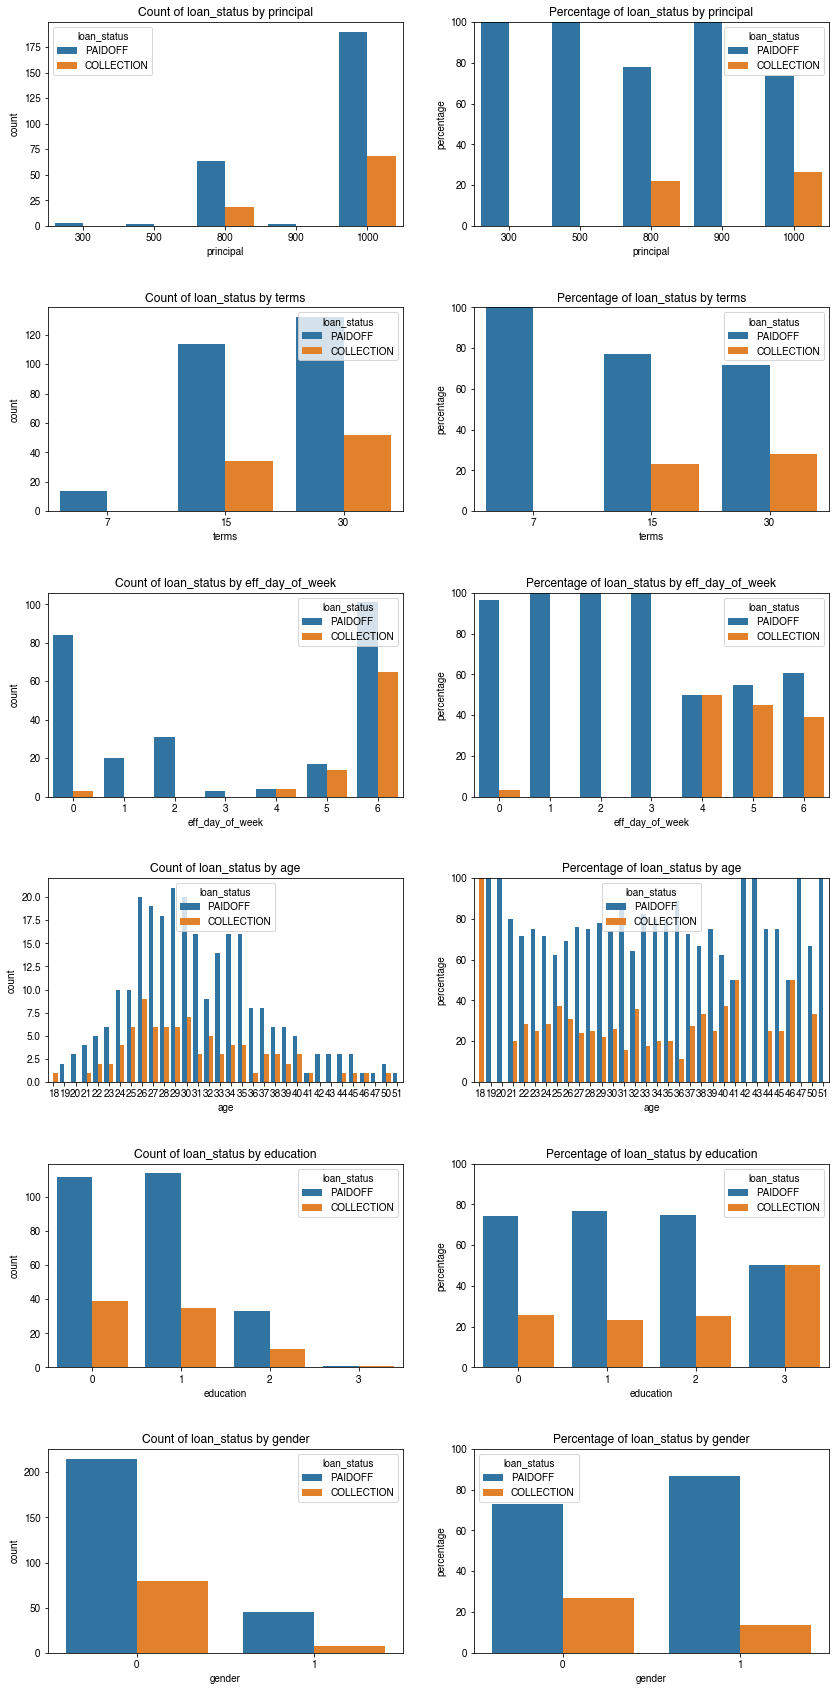

In [584]:
cols = 2
rows = len(KNN_df.columns) - 1
fig, ax = plt.subplots(rows, cols, figsize = [7 * cols, 5 * rows])

for i, col in enumerate(KNN_df.columns):
    if i == 0:
        continue
    row = i - 1
    sns.countplot(x = col, hue = 'loan_status', data = KNN_df, ax = ax[row, 0])
    sns.barplot(x = col, hue = 'loan_status', hue_order = ['PAIDOFF', 'COLLECTION'], y = 'percentage', data = KNN_df.groupby([col])['loan_status'].value_counts(normalize = True).rename('percentage').mul(100).reset_index().sort_values(col), ax = ax[row, 1])
    ax[row, 0].title.set_text("Count of loan_status by " + col)
    ax[row, 1].title.set_text("Percentage of loan_status by " + col)
    ax[row, 1].set(ylim = (0, 100))

plt.subplots_adjust(wspace = 0.2, hspace = 0.4)
plt.show()

#### Split Feature Target Splits

In [585]:
KNN_features_df = KNN_df[['principal', 'terms', 'eff_day_of_week', 'age', 'gender', 'education']]
KNN_features = preprocessing.StandardScaler().fit(KNN_features_df).transform(KNN_features_df)
KNN_features_df = pd.DataFrame(KNN_features)
KNN_features_df.set_axis(['principal', 'terms', 'eff_day_of_week', 'age', 'gender', 'education'], axis = 1, inplace = True)

KNN_target = KNN_df['loan_status']
KNN_target_df = pd.DataFrame(KNN_target)
KNN_target_df.set_axis(['loan_status'], axis = 1, inplace = True)

print("Features:")
display(KNN_features_df.head())
print()
print("Target:")
display(KNN_target_df.head())

Features:


,principal,terms,eff_day_of_week,age,gender,education
0,0.515785,0.920718,-0.261221,2.331526,-0.420560,-0.995125
1,0.515785,0.920718,-0.261221,0.341701,2.377782,1.838728
2,0.515785,-0.959111,-0.261221,-0.653211,-0.420560,0.421802
3,0.515785,0.920718,0.121755,-0.487392,2.377782,0.421802
4,0.515785,0.920718,0.121755,-0.321573,-0.420560,0.421802



Target:


,loan_status
0,PAIDOFF
1,PAIDOFF
2,PAIDOFF
3,PAIDOFF
4,PAIDOFF


#### Split Test Train Sets

In [586]:
x_train, x_test, y_train, y_test = train_test_split(KNN_features, KNN_target, test_size = 0.2, random_state = 4)

print("Total Size    : " + str(len(KNN_df)))
print("Train Set Size: " + str(len(x_train)))
print("Test Set Size : " + str(len(x_test)))

Total Size    : 346
Train Set Size: 276
Test Set Size : 70


#### Optimize K

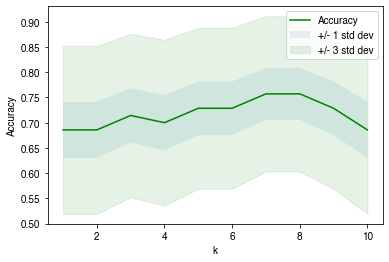

The highest accuracy of 0.7571428571428571 resulted from k of 7


In [587]:
num_ks = 10
mean_accs = np.zeros(num_ks)
std_devs = np.zeros(num_ks)

for k in range(1, num_ks + 1):
    model = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)
    y_hat = model.predict(x_test)
    mean_accs[k - 1] = metrics.accuracy_score(y_test, y_hat)
    std_devs[k - 1] = np.std(y_hat == y_test) / np.sqrt(y_hat.shape[0])

plt.plot(range(1, num_ks + 1), mean_accs, 'g')
plt.fill_between(range(1, num_ks + 1), mean_accs - 1 * std_devs, mean_accs + 1 * std_devs, alpha = 0.1)
plt.fill_between(range(1, num_ks + 1), mean_accs - 3 * std_devs, mean_accs + 3 * std_devs, alpha = 0.1, color = 'green')

plt.title = 'Accuracy by k'
plt.legend(('Accuracy', '+/- 1 std dev', '+/- 3 std dev'))
plt.ylabel('Accuracy')
plt.xlabel('k')
plt.show()

k_optimal = mean_accs.argmax() + 1
print("The highest accuracy of", mean_accs.max(), "resulted from k of", k_optimal)

#### Fit Optimal Model

In [588]:
KNN_model = KNeighborsClassifier(n_neighbors = k_optimal).fit(KNN_features, KNN_target)

Note: different random_state values used for train_test_split will produce different k_optimal values. To circumvent this, cross validation may be used to stabilize k, as the effect of the duplicate values from bootstrapping may be magnified by KNN. This is room for improvement for future builds.

## K Nearest Neighbors Model Evaluation
#### Initialize Environment